# Digging More Deeply Into Convolutional Networks

## Goals

In these questions students will have an opportunity to explore what happens when an image goes through a convolutional neural network. Students will do the following:

    - Load models into pytorch
    - Visualize an image as it passes through the convolutional network
    

## Dependincies 

In [1]:
# loading code from the assignment
from src.models import Large_Dog_Classifier
from data.my_dataset import MyDataset
from src.run_model import run_model
from data.dogs import DogsDataset
from data.my_dataset import MyDataset

# torch code that we need
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

import os

## Setup

We will be using a pre trained model for this assignment! In the following cell we will load the weights for the pre-trained model. The weights of the model are found in the experiments folder.

You will create a new `Large_Dog_Classifier`, then load the saved weights into the model. <a href="https://pytorch.org/tutorials/beginner/saving_loading_models.html">Here is a link to the PyTorch website with more details. </a>

In [2]:
#create instance
model = Large_Dog_Classifier()

In [3]:
# students will specify the file path here
model_weights_path = 'experiments/large-CNN'

In [4]:
# load in the DogSet dataset
model.load_state_dict(torch.load(model_weights_path))

<All keys matched successfully>

In [5]:
# Print out the layers of the network
model.eval()

Large_Dog_Classifier(
  (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(4, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(6, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(8, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(10, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(12, 14, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(14, 16, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=11664, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

# Filter Image
Here we load in an image from the test set to visualize it as it passes through the network, try to find a close up of a dog's face for the best results.

In [6]:
#loading in images
dogs = DogsDataset('data/DogSet')
dog_trainingX, dog_trainingY = dogs.get_train_examples()
dog_validX, dog_validY = dogs.get_validation_examples()
dog_testX, dog_testY = dogs.get_test_examples()

dogtrainset = MyDataset(dog_trainingX, dog_trainingY)
dogvalidset = MyDataset(dog_validX, dog_validY)
dogtestset = MyDataset(dog_testX, dog_testY)

loading train...
loading valid...
loading test...
Done!


In [7]:
len(dog_testX)

555

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


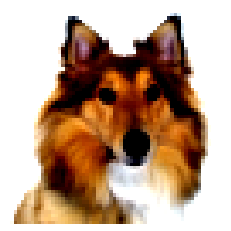

torch.Size([1, 64, 64, 3])


In [8]:
# grab an image from the testing set, it doesn't have to be random.
# if you're having trouble finding a good image we found 86,
img_num = np.random.randint(555)
filter_image = dog_testX[img_num]

# we need to put the image into a tensor since the network expects input to come in batches
# our batch size will be 1
filter_image = torch.tensor([filter_image])

# function to plot our image 
def imshow(img):
    npimg = img.numpy()
    plt.imshow(npimg)
    plt.axis('off')
    plt.show()
filter_image = filter_image/2 +.5

# display the image, students will write this
imshow(filter_image[0])
print(filter_image.shape)

If you filled out the cell above correctly you should see a dog image above

In [9]:
# permute the image just as you did in the homework
filter_image = filter_image.permute(0, 3, 1, 2)



# pass the image through the network and save the output to a variable
filter1 = model.conv1(filter_image)  # what img looks like after 1st layer without applying relu yet
filter2 = model.conv2(F.relu(filter1)) # apply relu to img, pass to 2nd layer
filter3 = model.conv3(F.relu(filter2)) # and so on
filter4 = model.conv4(F.relu(filter3))
filter5 = model.conv5(F.relu(filter4))
filter6 = model.conv6(F.relu(filter5))
filter7 = model.conv7(F.relu(filter6))
#fcs
fc1 = F.relu(model.fc1(F.relu(filter7).view(-1, 11664)))
fc2 = model.fc2(fc1)


#we need to detach the gradient variable and convert the tensors to numpy arrays
filter1 = filter1.detach().numpy()
filter2 = filter2.detach().numpy()
filter3 = filter3.detach().numpy()
filter4 = filter4.detach().numpy()
filter5 = filter5.detach().numpy()
filter6 = filter6.detach().numpy()
filter7 = filter7.detach().numpy()
#fcs
fc1 = fc1.detach().numpy()
fc2 = fc2.detach().numpy()

In [10]:
filters = [filter1, filter2, filter3, filter4, filter5, filter6, filter7]

## Visualizing the filters

Here is an included helper function for visualizing the images as they are passed through the network, run this function with your output from the previous cell to see an image pass through the network.

In [11]:
def graph_filters(filters):
    """
        graph_filter - graphs a list of images which have been taken out at various stages of a CNN

        args:
            filters (list) - list containg the output of a convolutional layer in the network

    """
    for filter_mat in filters:
        channels = filter_mat.shape[1]
        display_grid = np.zeros((filter_mat.shape[3], channels * filter_mat.shape[3]))
        print(display_grid.shape)
        for i in range(channels):
            x = filter_mat[0, i, :, :]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            display_grid[:, i * filter_mat.shape[3] : (i + 1) * filter_mat.shape[3]] = x
        
        scale = 40. / channels
        plt.grid(False)
        plt.figure(figsize=(scale * channels, scale))
        plt.axis('off')
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

(64, 256)
(64, 384)
(62, 496)
(60, 600)
(58, 696)
(56, 784)
(27, 432)


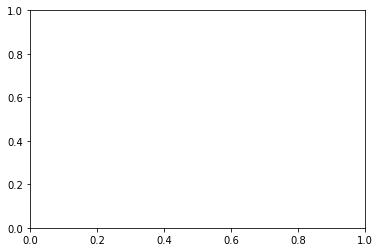

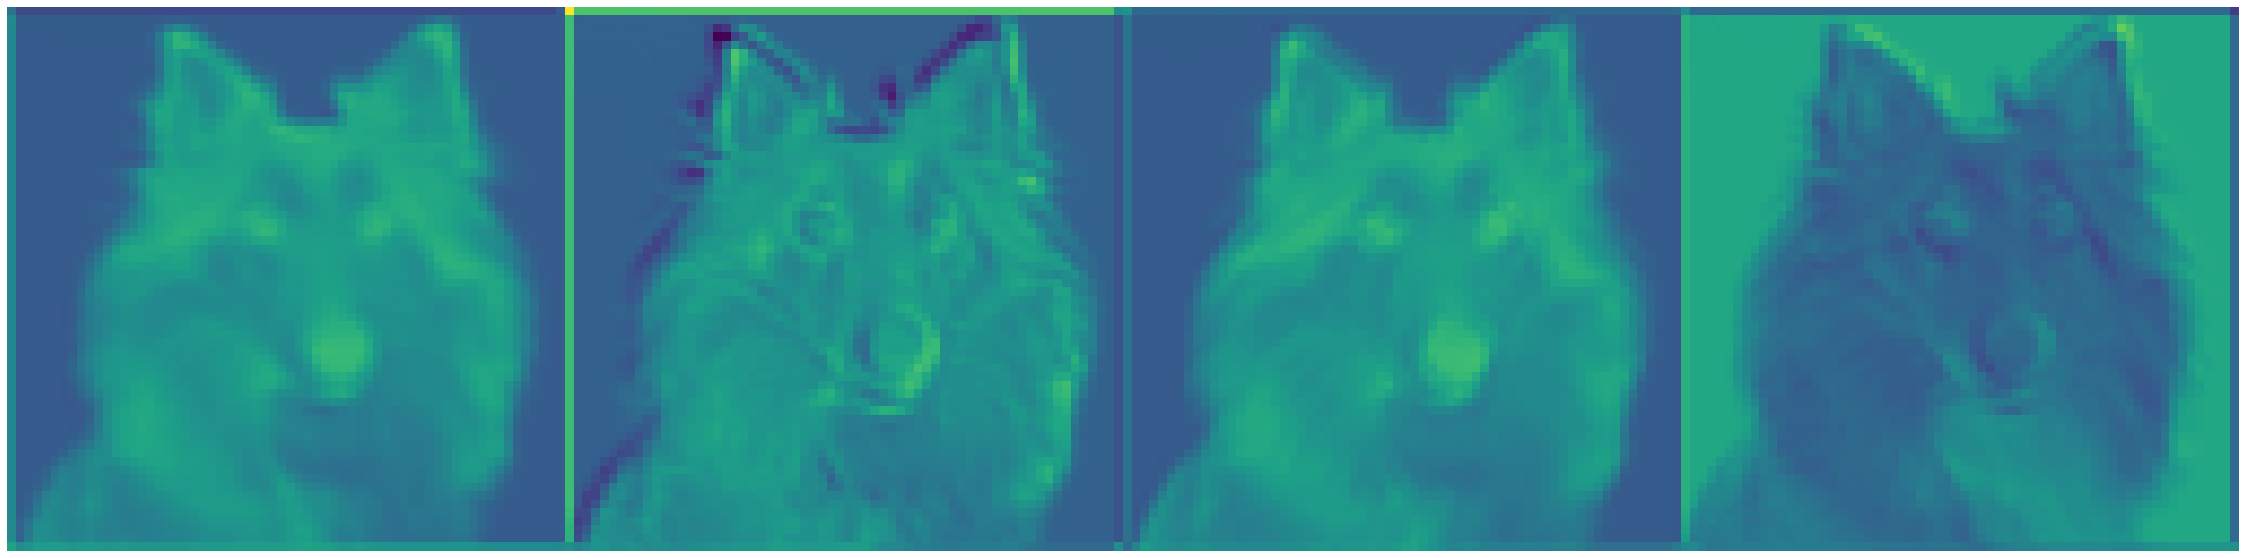

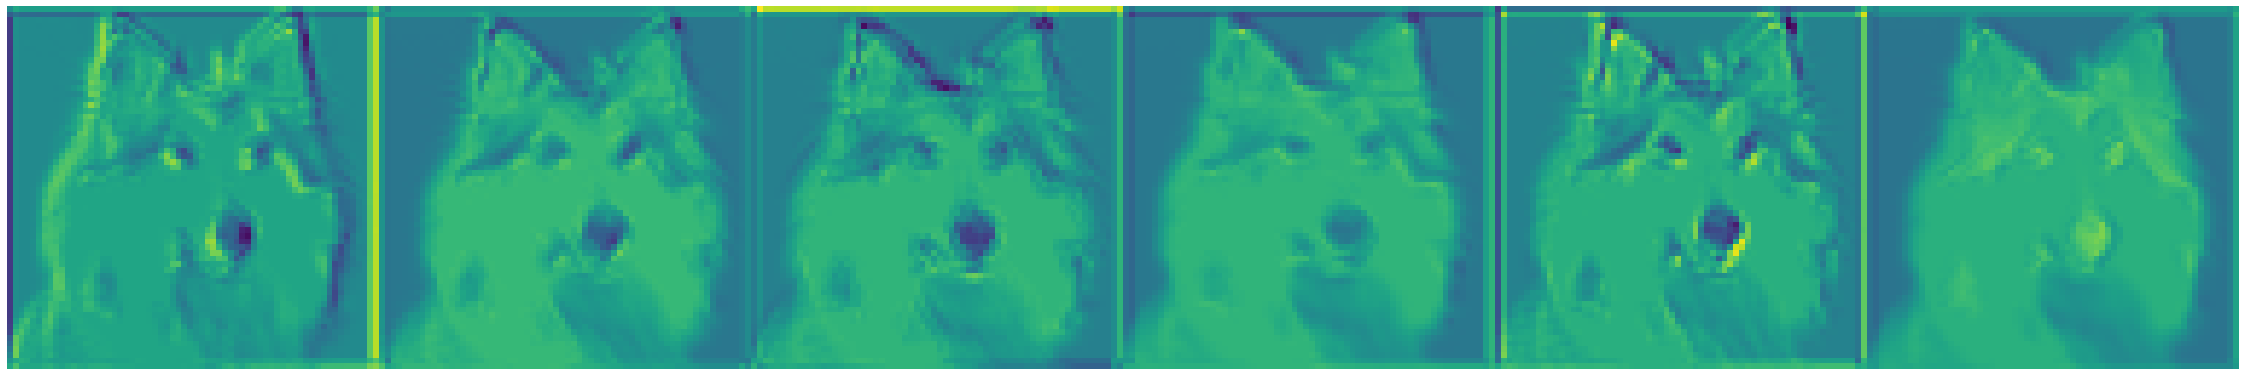

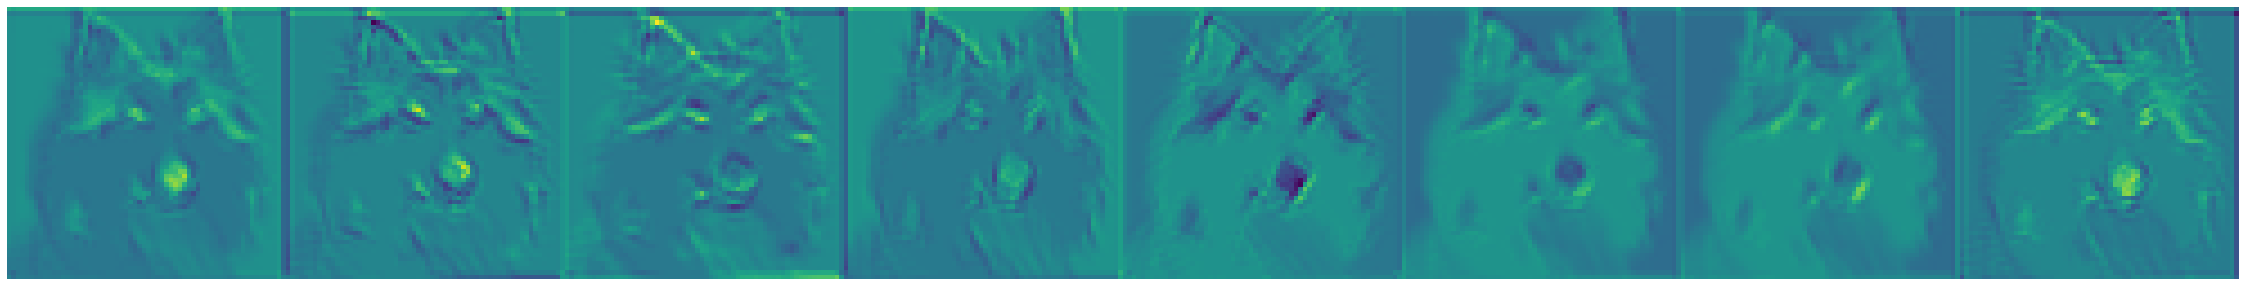

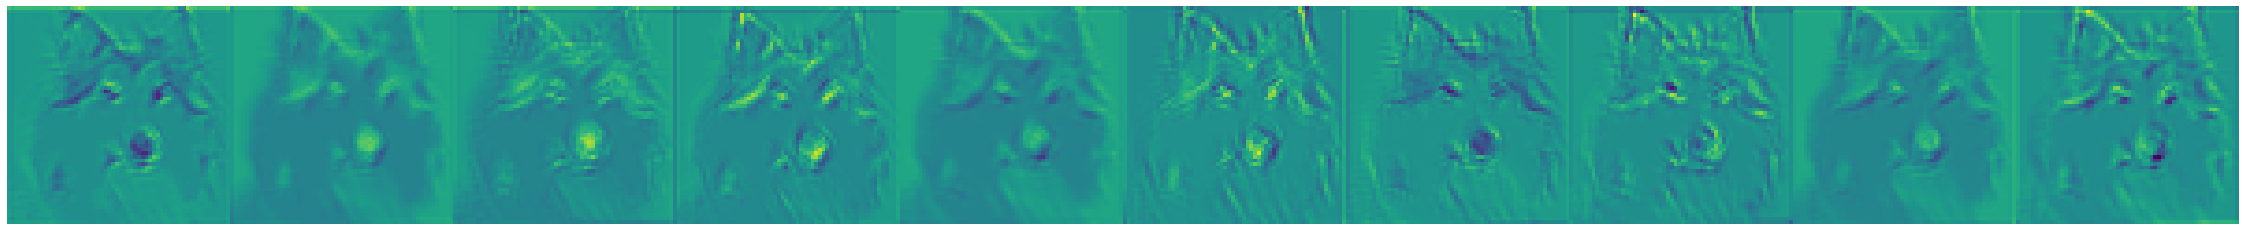

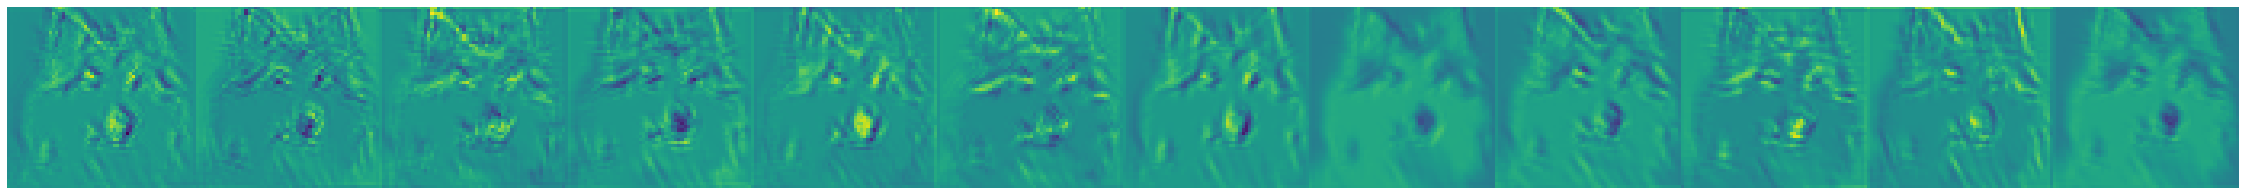

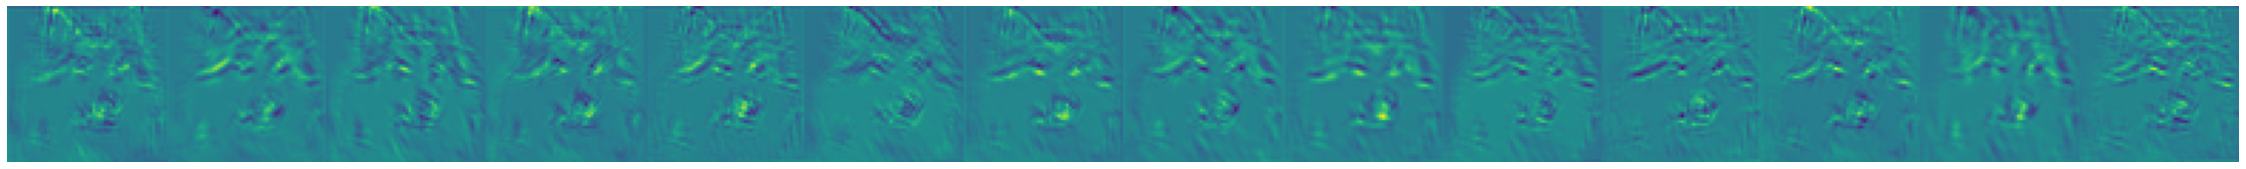

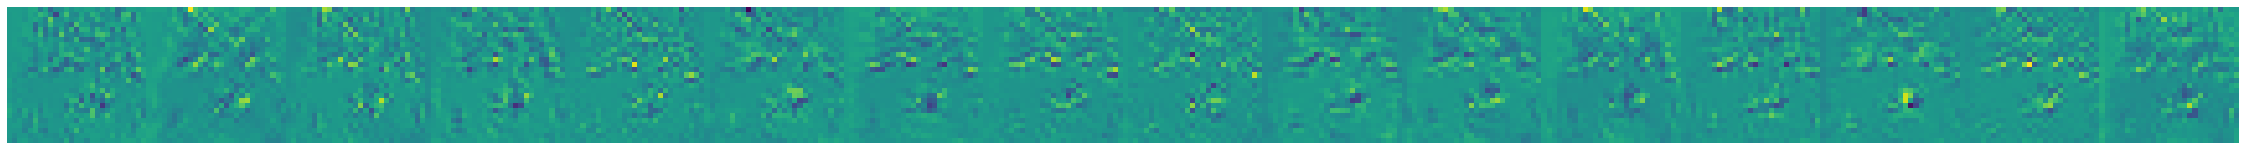

In [12]:
# use this function to view the iamges as they are passed through the CNN
graph_filters(filters)

## Follow-Up Questions
Please explain the following about the ouput and include your graphs in your write-up.

    - (a) What does each graph of the seven graphs represent? Why are the images repeated several times on each of the seven graphs?
    
    Each of the seven graphs represents what the outputting vector is like after the respective convolution layer. E.g. 3rd graph = the output of the image after the 3rd convolution layer. The images are repeated several times because as we can see when we print out the shape after each convolution layer, the 2nd dimension element increases. Meaning, the channels are increased from the original 3->4->6->8 and so on throughout the layers.
    
    - (b) What do light regions of the graphs indicate? Take your best guess on this question, we want you to think about what's happening in a CNN using what you've learned in class. 
    
    I think the light regions represent the areas in the image that is sensitive to some filter that's being applied. Since lighter colors means higher values in the vector, it means applying some filter on the vector results in these specific pixel values to be returned. I think it's part of feature identification/selection throughout the layers.

    - (c) What are the ouput dimensons of each of the CNN layers?


In [13]:
# output dims of each CNN layer
print(f'filter1: {filter1.shape}')
print(f'filter2: {filter2.shape}')
print(f'filter3: {filter3.shape}')
print(f'filter4: {filter4.shape}')
print(f'filter5: {filter5.shape}')
print(f'filter6: {filter6.shape}')
print(f'filter7: {filter7.shape}')
print(f'fc1: {fc1.shape}')
print(f'fc2: {fc2.shape}')

filter1: (1, 4, 64, 64)
filter2: (1, 6, 64, 64)
filter3: (1, 8, 62, 62)
filter4: (1, 10, 60, 60)
filter5: (1, 12, 58, 58)
filter6: (1, 14, 56, 56)
filter7: (1, 16, 27, 27)
fc1: (1, 1024)
fc2: (1, 10)
